# **Capítulo 6: Redes neuronales recurrentes**

## Predicción del valor en bolsa de una compañía

Descargamos los datos del caso práctico

In [ ]:
!wget -q https://github.com/deep-learning-keras-pytorch/deep-learning-keras-pytorch.github.io/blob/master/docs/cap6/AAPL.csv

Carga y visualización de los datos del caso práctico

In [ ]:
import pandas as pd

# Leemos el fichero
data = pd.read_csv('AAPL.csv', parse_dates=['Date'])
# Mostramos las 5 primeras filas
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-12-31,72.932854,76.485718,72.714287,76.024284,67.190933,164873100
1,2013-01-02,79.117142,79.285713,77.375717,78.432854,69.319641,140129500
2,2013-01-03,78.268570,78.524284,77.285713,77.442856,68.444672,88241300
3,2013-01-04,76.709999,76.947144,75.118568,75.285713,66.538162,148583400
4,2013-01-07,74.571426,75.614288,73.599998,74.842857,66.146751,121039100


Mostramos una gráfica con el precio de apertura de la acción

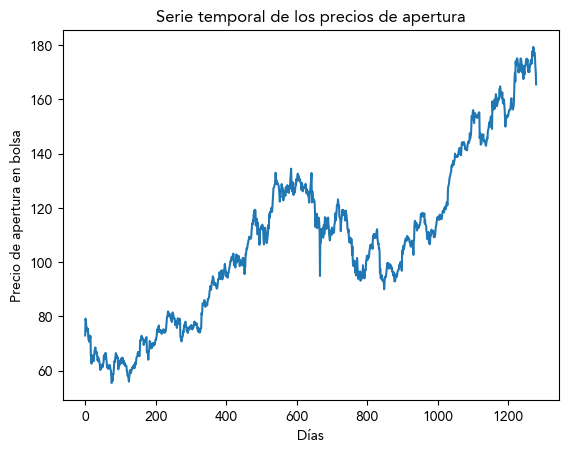

In [ ]:
import matplotlib.pyplot as plt

data['Open'].plot()
plt.xlabel('Días')
plt.ylabel('Precio de apertura en bolsa')
plt.title('Serie temporal de los precios de apertura')
plt.show()

Normalización de los datos

In [ ]:
import numpy as np

# Normalizamos los datos
data['Open Scaled'] = (data['Open'] - np.min(data['Open'])) / (np.max(data['Open']) - np.min(data['Open']))
# Comprobamos que los datos están normalizados
data[['Open', 'Open Scaled']].head()

,Open,Open Scaled
0,72.932854,0.141260
1,79.117142,0.191155
2,78.268570,0.184309
3,76.709999,0.171734
4,74.571426,0.154480


Preparación de los datos para entrenar la red neuronal

In [ ]:
N = 60

# Guardamos los valores de apertura en un vector
vals_norm = data['Open Scaled'].values

X = [] # Matriz base para predecir
Y = [] # Vector con las etiquetas
for i in range(N, len(vals_norm)):
    X.append(vals_norm[i-N:i])
    Y.append(vals_norm[i])
# Los convertimos en arrays de NumPy
X = np.array(X)
X = np.expand_dims(X, axis=2) # [batch, num_elem, input_size]
Y = np.array(Y)

# Dimensiones de los conjuntos de datos
print(f'Tamaño del conjunto de datos de entrada: {X.shape}')
print(f'Tamaño del conjunto de datos de salida: {Y.shape}')

Tamaño del conjunto de datos de entrada: (1220, 60, 1)
Tamaño del conjunto de datos de salida: (1220,)


Creación de los conjuntos de entrenamiento y test

In [ ]:
X_train, X_test = X[:-30], X[-30:]
Y_train, Y_test = Y[:-30], Y[-30:]

Implementación de la RNN

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

modelo = Sequential()
# Indicamos el tamaño de los datos de entrada en la primera capa
modelo.add(layers.LSTM(units=128, input_shape=(X.shape[1], X.shape[2])))
# Problema de regresión
modelo.add(layers.Dense(1))
# Visualizamos la arquitectura del modelo
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


Compilación de la RNN

In [ ]:
modelo.compile(optimizer='adam', loss='mean_squared_error')

Llamada al entrenamiento del modelo

In [ ]:
modelo.fit(X_train, Y_train, batch_size=32, epochs=50, verbose=2)

Epoch 1/50
38/38 - 5s - loss: 0.0219 - 5s/epoch - 120ms/step
Epoch 2/50
38/38 - 0s - loss: 9.5973e-04 - 260ms/epoch - 7ms/step
Epoch 3/50
38/38 - 0s - loss: 6.5018e-04 - 190ms/epoch - 5ms/step
Epoch 4/50
38/38 - 0s - loss: 6.1835e-04 - 168ms/epoch - 4ms/step
Epoch 5/50
38/38 - 0s - loss: 6.2368e-04 - 171ms/epoch - 4ms/step
Epoch 6/50
38/38 - 0s - loss: 6.1186e-04 - 163ms/epoch - 4ms/step
Epoch 7/50
38/38 - 0s - loss: 5.8560e-04 - 168ms/epoch - 4ms/step
Epoch 8/50
38/38 - 0s - loss: 5.7170e-04 - 178ms/epoch - 5ms/step
Epoch 9/50
38/38 - 0s - loss: 5.6359e-04 - 235ms/epoch - 6ms/step
Epoch 10/50
38/38 - 0s - loss: 5.5940e-04 - 257ms/epoch - 7ms/step
Epoch 11/50
38/38 - 0s - loss: 5.4836e-04 - 326ms/epoch - 9ms/step
Epoch 12/50
38/38 - 0s - loss: 6.0767e-04 - 366ms/epoch - 10ms/step
Epoch 13/50
38/38 - 0s - loss: 5.2216e-04 - 246ms/epoch - 6ms/step
Epoch 14/50
38/38 - 0s - loss: 5.0936e-04 - 269ms/epoch - 7ms/step
Epoch 15/50
38/38 - 0s - loss: 5.0220e-04 - 292ms/epoch - 8ms/step
Epoch 16

Predicción sobre el conjunto de datos de test

In [ ]:
Y_pred = modelo.predict(X_test)

1/1 [==============================] - 0s 329ms/step


Visualización de las predicciones del modelo entrenado

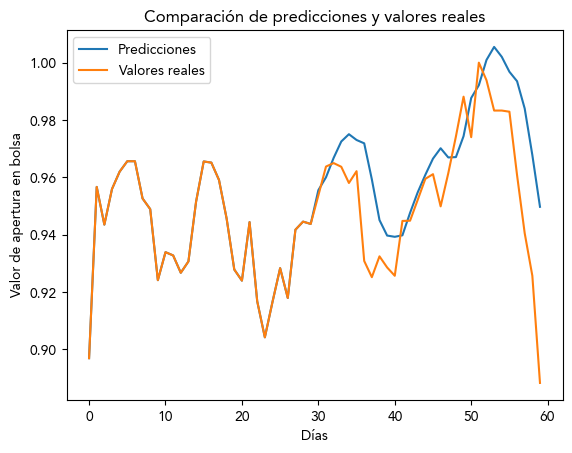

In [ ]:
plt.plot(range(30, 60), Y_pred.flatten(), label='Predicciones')
plt.plot(range(60), Y[-60:], label='Valores reales')
plt.xlabel('Días')
plt.ylabel('Valor de apertura en bolsa')
plt.title('Comparación de predicciones y valores reales')
plt.legend()
plt.show()